#  This is assignment08 

# Name:PENG CIYUAN 

# Student ID:2018220161 

# Link:https://github.com/pcyyyy/assignment08.git

# Getting train data and test data

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

file_data_train = "mnist_train.csv"
file_data_test  = "mnist_test.csv"

h_data_train    = open(file_data_train, "r")
h_data_test     = open(file_data_test, "r")

data_train      = h_data_train.readlines()
data_test       = h_data_test.readlines()

h_data_train.close()
h_data_test.close()

size_row    = 28    # height of the image
size_col    = 28    # width of the image

num_train   = len(data_train)   # number of training images
num_test    = len(data_test)    # number of testing images


#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image_train    = np.empty((size_row * size_col, num_train), dtype=float)
list_label_train    = np.empty(num_train, dtype=int)

list_image_test     = np.empty((size_row * size_col, num_test), dtype=float)
list_label_test     = np.empty(num_test, dtype=int)

count = 0

for line in data_train:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_train[count]     = label
    list_image_train[:, count]  = im_vector    



    count += 1

count = 0

for line in data_test:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label_test[count]      = label
    list_image_test[:, count]   = im_vector    

    count += 1

# Making Convolution Feature：6*6

In [5]:
def filt(matrix):
    kernel = np.array([[ -1, -1, -1, -1, -1,-1],[-1,  -1,  -1,  -1, -1,-1],[-1,  0,  9, 9,0, -1],[-1,  0,  9,  9, 0,-1],[-1, -1, -1, -1, -1,-1],[-1, -1, -1, -1, -1,-1]])
    matrix = signal.convolve2d(matrix, kernel, boundary='symm', mode='same')
    return matrix

# Computing the optimal set A of model parameters

In [6]:
xa=list_image_train.T
x=[]
for i in range(len(xa)):
        x_ = xa[i].reshape((size_row, size_col))
        x_ = filt(x_)
        x_ = np.ravel(x_, order='C')
        x.append(x_)
x=np.array(x)        
              
def vecY(Y):
    for i in range(0, len(Y)):
        if(int(Y[i]) == 0):
            Y[i] = 1 
        else:
            Y[i] = -1 
    return Y
    
y = vecY( list_label_train)    
    
A1=np.linalg.inv((x.T).dot(x))
A2=(x.T).dot(y)
A=(A1).dot(A2)
print(A)

[ 9.38775052e+14  2.59374095e+14 -5.83312265e+15 -1.35743344e+13
  2.95550148e+15  5.01836918e+14  4.98277969e+14  5.86391101e+14
 -3.15390129e+15  1.22630628e+14  1.71879695e+15  7.18812299e+13
 -9.38110160e+14  8.47233688e+14 -6.08290205e+14  2.88909343e+14
  7.65565477e+14 -3.07032457e+14 -2.55031691e+15  1.00175344e+15
  1.78927975e+15  5.30756026e+14  1.88487794e+14 -6.65434906e+14
 -4.40902515e+15  1.06268353e+15  4.04727969e+15  8.49418508e+14
  2.85682950e+11  1.54722262e+11 -4.29130378e+10 -3.69415404e+09
 -8.54057107e+09  4.52109349e+09 -6.64878825e+09  5.44559461e+09
 -5.99969540e+09  5.61921035e+09 -5.76649632e+09  5.59687548e+09
 -5.60927171e+09  5.51249420e+09 -5.49052850e+09  5.43916987e+09
 -5.42972503e+09  5.42294946e+09 -5.44505231e+09  5.47848395e+09
 -5.52994149e+09  5.58910075e+09 -5.65702713e+09  5.72475866e+09
 -5.81367888e+09  5.94409097e+09 -6.30142587e+09  5.08986626e+09
  3.09136946e+14 -3.07961737e+14  3.25534880e+14 -3.47070221e+14
  1.81425215e+13 -3.06507

# Getting featrue function

In [7]:
testx=[]
xb=list_image_test.T
for i in range(len(xb)):
        x = xb[i].reshape((size_row, size_col))
        x = filt(x)
        x = np.ravel(x, order='C')
        testx.append(x)
testx=np.array(testx)
testy=vecY( list_label_test)
Y = (testx).dot(A)

# Binary Classification:FN,FP,TN,TP

In [10]:
FN = []; FP = []; TN = []; TP = []

for i in range(0, len(Y)):
        if(float(Y[i]) > 0):
            if(int(testy[i]) == 1):
                TP.append(testx[i])
            else:
                FP.append(testx[i])
        else:
            if(int(testy[i]) == 1):
                FN.append(testx[i])
            else:
                TN.append(testx[i])

accuracy = ((len(TN)+len(TP))/10000)*100
print("Accuracy: ",accuracy)

Accuracy:  50.81


# Compute the Accuracy

In [11]:
def computeMin(vec):
    vec = np.mat(vec)
    mean_ = np.mean(vec, axis=0)
    return mean_

# Plot the average image of TP, FP,TN,FN

(-0.5, 27.5, 27.5, -0.5)

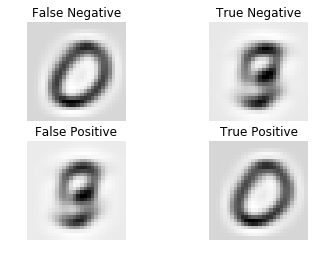

In [13]:
f2 = plt.figure(2)

im_average  = np.zeros((size_row * size_col, 10), dtype=float)
im_count    = np.zeros(10, dtype=int)


P1 = plt.subplot(2, 2, 1)
P1.set_title('False Negative')
im_average = computeMin(FN)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P2 = plt.subplot(2, 2, 2)
P2.set_title('True Negative')
im_average = computeMin(TN)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P3 = plt.subplot(2, 2, 3)
P3.set_title('False Positive')
im_average = computeMin(FP)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')

P4 = plt.subplot(2, 2, 4)
P4.set_title('True Positive')
im_average = computeMin(TP)
plt.imshow(im_average.reshape((size_row, size_col)), cmap='Greys', interpolation='None') 
plt.axis('off')